In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix

In [20]:
df = pd.read_csv('../Data/data_cleaned.csv')
df.head(2)

,Unnamed: 0,country,region,year,happiness_score,economy_(gdp_per_capita),family,health_(life_expectancy),freedom,trust_(government_corruption),generosity,dystopia_residual,food_supply_(kcal/capita/day),"crude_birth_rate_(births_per_1,000_population)",deaths_-_unsafe_water_source_per_100k_people,deaths_-_conflict_and_terrorism
0,0,Switzerland,Western Europe,2015,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,3460.0,10.364,0.030155,0.0
1,1,Iceland,Western Europe,2015,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,3548.0,12.933,0.021300,0.0


In [21]:
df = df.drop(columns=['Unnamed: 0'])

In [22]:
df['region'].value_counts()

Sub-Saharan Africa                 117
Central and Eastern Europe          87
Latin America and Caribbean         68
Western Europe                      63
Middle East and Northern Africa     58
Southeastern Asia                   26
Southern Asia                       21
Eastern Asia                        18
Australia and New Zealand            6
North America                        6
Name: region, dtype: int64

In [23]:
country_to_numeric = {'Sub-Saharan Africa': 1, 'Central and Eastern Europe': 2, 'Latin America and Caribbean': 3, 
                     'Western Europe': 4, 'Middle East and Northern Africa': 5, 'Southeastern Asia': 6,
                     'Southern Asia': 7, 'Eastern Asia': 8, 'North America': 9, 'Australia and New Zealand': 10}

df['region'] = df['region'].replace(country_to_numeric)

In [24]:
X = df.drop(columns=['country', 'region'])
Y = df['region']

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 42, stratify=Y)

In [25]:
pipe = Pipeline([
    ('ss', StandardScaler(with_mean=False)),
    ('model', KNeighborsClassifier())
])

In [26]:
params = {
    'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'model__weights': ['uniform', 'distance'],
    'model__leaf_size': [15, 30, 45],
    'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.7016901408450704


{'model__algorithm': 'auto',
 'model__leaf_size': 15,
 'model__n_neighbors': 3,
 'model__weights': 'distance'}

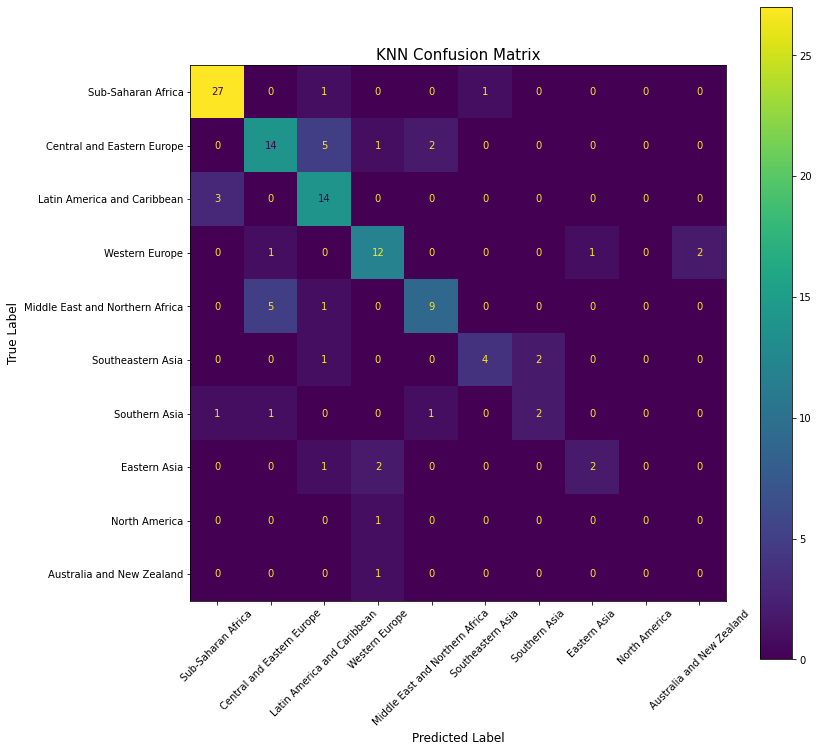

In [27]:
fig, ax = plt.subplots(figsize=(12, 12))
plot_confusion_matrix(gs, X_test, y_test, display_labels=['Sub-Saharan Africa', 'Central and Eastern Europe', 'Latin America and Caribbean', 
                     'Western Europe', 'Middle East and Northern Africa', 'Southeastern Asia',
                     'Southern Asia', 'Eastern Asia', 'North America', 'Australia and New Zealand'], ax=ax)
plt.xticks(rotation=45)
plt.title('KNN Confusion Matrix', size=15)
plt.xlabel('Predicted Label', size=12)
plt.ylabel('True Label', size=12);
plt.savefig('../Visualizations/KNNConfMatr.png', bbox_inches='tight')

In [28]:
y_pred = gs.predict(X_test)

In [29]:
# Inspiration https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))


Accuracy: 0.71

Micro Precision: 0.71
Micro Recall: 0.71
Micro F1-score: 0.71

Macro Precision: 0.56
Macro Recall: 0.51
Macro F1-score: 0.53

Weighted Precision: 0.71
Weighted Recall: 0.71
Weighted F1-score: 0.71


C:\Users\Spencer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Spencer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Sub-Saharan Africa', 'Central and Eastern Europe', 'Latin America and Caribbean', 
                     'Western Europe', 'Middle East and Northern Africa', 'Southeastern Asia',
                     'Southern Asia', 'Eastern Asia', 'North America', 'Australia and New Zealand']))


Classification Report

                                 precision    recall  f1-score   support

             Sub-Saharan Africa       0.87      0.93      0.90        29
     Central and Eastern Europe       0.67      0.64      0.65        22
    Latin America and Caribbean       0.61      0.82      0.70        17
                 Western Europe       0.71      0.75      0.73        16
Middle East and Northern Africa       0.75      0.60      0.67        15
              Southeastern Asia       0.80      0.57      0.67         7
                  Southern Asia       0.50      0.40      0.44         5
                   Eastern Asia       0.67      0.40      0.50         5
                  North America       0.00      0.00      0.00         1
      Australia and New Zealand       0.00      0.00      0.00         1

                       accuracy                           0.71       118
                      macro avg       0.56      0.51      0.53       118
                   weight

C:\Users\Spencer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Spencer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Spencer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
